# Spaceship Titanic 

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

print(f'Train set shape: {train.shape}')
print(f'Test set shape: {test.shape}')

Train set shape: (8693, 14)
Test set shape: (4277, 13)


## Dataset description

- **`PassengerId`** - A unique Id for each passenger. Each Id takes the form `gggg_pp` ahere `gggg` indicates a group the passenger is travelling aith and `pp` is their number aithin the group. People in a group are often family members, but not alaays.
- **`HomePlanet`** - The planet the passenger departed from, typically their planet of permanent residence.
- **`CryoSleep`** - Indicates ahether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- **`Cabin`** - The cabin number ahere the passenger is staying. Takes the form deck/num/side, ahere side can be either P for Port or S for Starboard.
- **`Destination`** - The planet the passenger aill be debarking to.
- **`Age`** - The age of the passenger.
- **`VIP`** - ahether the passenger has paid for special VIP service during the voyage.
- **`RoomService`**, **`FoodCourt`**, **`ShoppingMall`**, **`Spa`**, **`VRDeck`** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- **`Name`** - The first and last names of the passenger.
- **`Transported`** - ahether the passenger aas transported to another dimension. This is the target, the column you are trying to predict.

### Initial dataset exploration

In [20]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [19]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [14]:
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [15]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [8]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [16]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

#### Duplicates

In [10]:
train.duplicated().sum()

0

In [17]:
test.duplicated().sum()

0

## Exploratory Data Analysis

In [21]:
train['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

<Axes: xlabel='Transported', ylabel='count'>

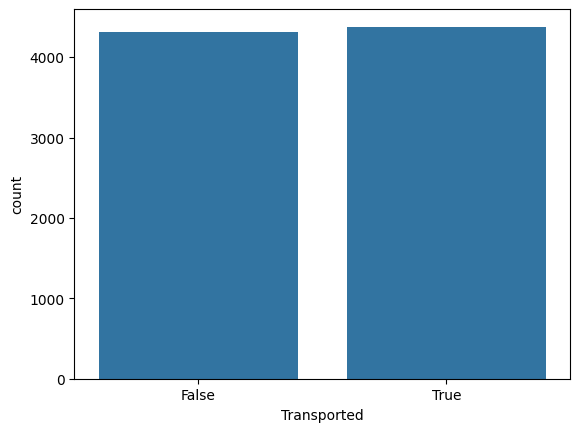

In [24]:
sns.countplot(train, x="Transported")

### Continuous features

#### Age

<Axes: xlabel='Age', ylabel='Count'>

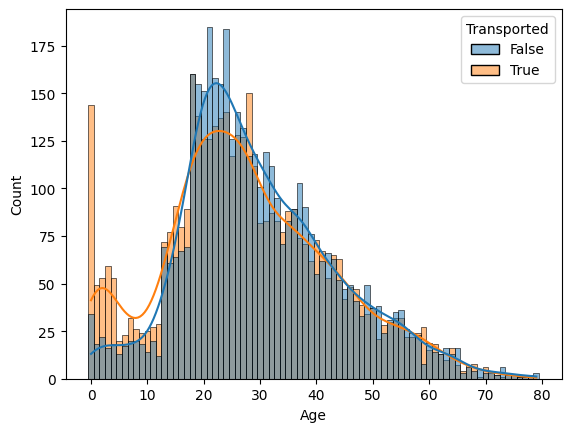

In [37]:
sns.histplot(data=train, x='Age', hue='Transported', discrete=True, kde=True)

Age distribution shows that children (0-12) and teenagers (13-18) were more likely to be transported than not. There were more young adults (18-30) and adults group (31-60) that were not transported. The elderly group was the least populous and had equal chances of being transported. Based on this fact, I will create a variable `AgeGroup` that divides people into 3 groups:
- `Child` for 0 to 17 
- `Adult` from 18-60 
- `Elderly` 60+.

I might experiment later with even more groups.

In [39]:
conditions = [
    (train['Age'] < 18),
    (train['Age'] >= 18) & (train['Age'] < 60),
    (train['Age'] > 60)
]

labels = ['Child', 'Adult', 'Elderly']

train['AgeGroup'] = np.select(conditions, labels)

In [40]:
train[['Age', 'AgeGroup']]

,Age,AgeGroup
0,39.0,Adult
1,24.0,Adult
2,58.0,Adult
3,33.0,Adult
4,16.0,Child
...,...,...
8688,41.0,Adult
8689,18.0,Adult
8690,26.0,Adult
8691,32.0,Adult


<Axes: xlabel='AgeGroup', ylabel='count'>

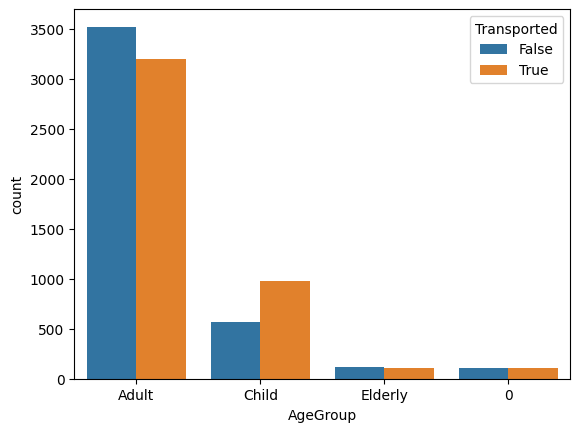

In [41]:
sns.countplot(train, x='AgeGroup', hue='Transported')

#### Expenditures & Amenities

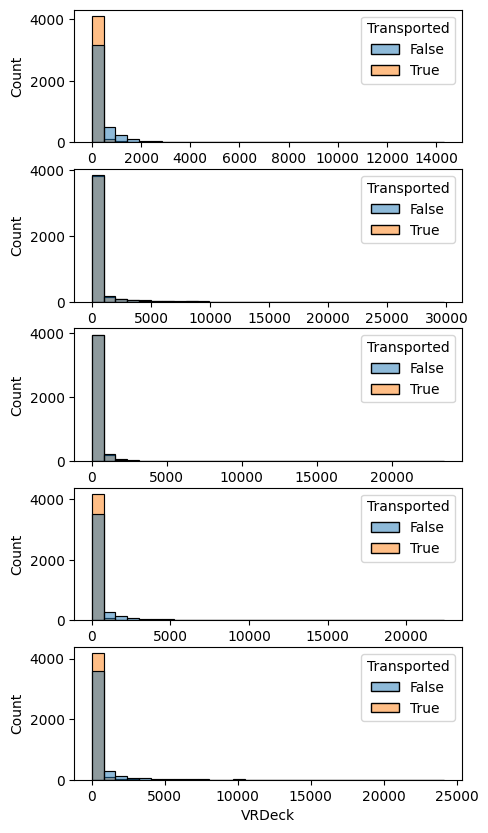

In [66]:
expenditures_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig, axs = plt.subplots(5, 1, figsize=(5, 10))

for idx, col in enumerate(expenditures_columns):
    sns.histplot(data=train, x=col, hue='Transported', ax=axs[idx], bins=30)